In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('BIKE DETAILS.csv')
pd.DataFrame(df)

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [ ]:
#1. What is the range of selling prices in the dataset?
df['selling_price'].min()


5000

In [ ]:
#2.What is the median selling price for bikes in the dataset?
df['selling_price'].median()


45000.0

In [ ]:
#3. What is the most common seller type?
df['seller_type'].mode()

0    Individual
Name: seller_type, dtype: object

In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
df[df['km_driven'] >= 50000]

name  selling_price  year seller_type  \
5                  Honda CB Twister          18000  2010  Individual   
15    Suzuki Access 125 [2007-2016]          25000  2012  Individual   
20             Hero Passion Pro 110          15000  2008  Individual   
31          Yamaha FZ S [2012-2016]          38000  2013  Individual   
32               Hero Xtreme Sports          43000  2016  Individual   
...                             ...            ...   ...         ...   
1050               Bajaj Pulsar 150          20000  2010  Individual   
1054               Hero  CBZ Xtreme          20000  2010  Individual   
1056                      Activa 3g          17000  2010  Individual   
1059                 Honda CB Shine          12000  2009  Individual   
1060               Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
5     1st owner      60000            53857.0  
15    1st owner      55000            58314.0  
20    1st owner      60000                NaN  
31    1st owner      75000            79432.0  
32    2nd owner      50000            78350.0  
...         ...        ...                ...  
1050  1st owner      60000            75000.0  
1054  1st owner      50000            78700.0  
1056  1st owner     500000            52000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[207 rows x 7 columns]

In [ ]:
#5. What is the average km_driven value for each ownership type?
df.groupby('owner')['km_driven'].mean()


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [ ]:
#6 What proportion of bikes are from the year 2015 or older?
df[df['year'] >= 2015].shape[0] / df.shape[0]


0.527803958529689

In [ ]:
#7. What is the trend of missing values across the dataset?
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]

name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0

In [ ]:
#9. What is the total number of bikes listed by each seller type?
df.groupby('seller_type')['name'].count()

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
df[df['owner'] == '1st owner'][['selling_price', 'km_driven']]

selling_price  km_driven
0            175000        350
1             45000       5650
2            150000      12000
3             65000      23000
5             18000      60000
...             ...        ...
1055          18000      35000
1056          17000     500000
1057          16000      33000
1059          12000      53000
1060          10000      92233

[924 rows x 2 columns]

In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method?
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df_no_outliers

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1054  1st owner      50000            78700.0  
1055  1st owner      35000            32000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  

[1015 rows x 7 columns]

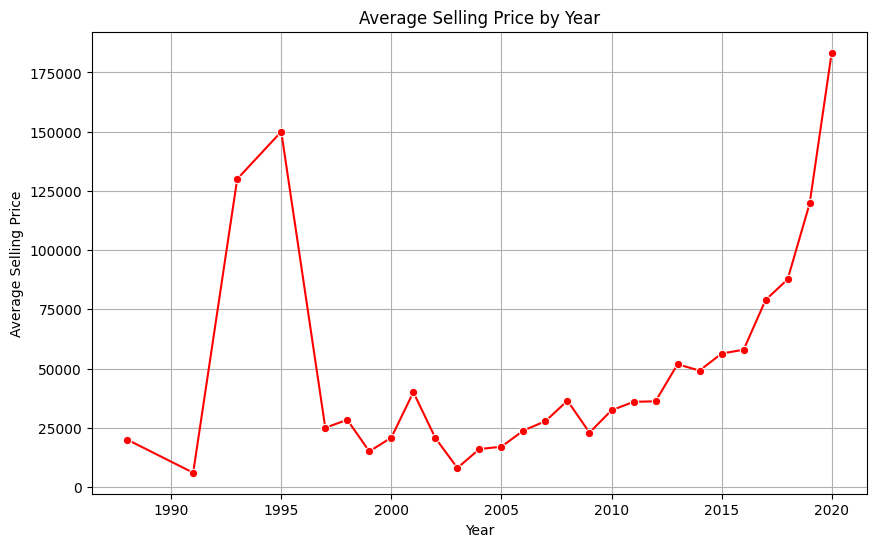

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='selling_price', data=avg_price_by_year, marker='o', color='red')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

In [ ]:
#13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2025
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation = df.groupby('age')['depreciation'].mean()
average_depreciation

/tmp/ipython-input-57-3477137933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = current_year - df['year']
/tmp/ipython-input-57-3477137933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['depreciation'] = df['selling_price'] - df['ex_showroom_price']


age
5     34260.000000
6     -2954.562500
7    -13023.194805
8    -22307.226190
9    -28750.407407
10   -28314.291139
11   -34287.812500
12   -42766.423077
13   -36609.529412
14   -47758.750000
15   -46757.280000
16   -41398.909091
17   -53021.166667
18   -42399.000000
19   -39664.500000
20   -44852.000000
21   -36852.000000
22             NaN
23             NaN
24   -34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64

In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
df = df.merge(average_price_by_year, on='year', suffixes=('', '_avg'))
df['price_difference'] = df['selling_price'] - df['selling_price_avg']
significant_priced_bikes = df[df['price_difference'] > 2 * df['selling_price_avg']]
significant_priced_bikes



name  selling_price  year seller_type  \
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
13                          Yamaha YZF R3         365000  2019  Individual   
134            Harley-Davidson Street Bob         750000  2013  Individual   
224  Royal Enfield Bullet 350 [2007-2011]          90000  2007  Individual   
289        Kawasaki Ninja 650 [2018-2019]         425000  2017  Individual   
291                   Kawasaki Ninja 250R         125000  2010  Individual   
295                       Suzuki GSX S750         760000  2019  Individual   
306                             Yamaha Rx          70000  2000  Individual   
311            Harley-Davidson Street 750         330000  2014  Individual   
344                            BMW G310GS         300000  2018  Individual   
411          KTM 390 Duke ABS [2013-2016]         180000  2015  Individual   
776             Royal Enfield Electra 5 S          99000  2006  Individual   
860        Kawasaki Ninja 650 [2018-2019]         300000  2011  Individual   
889         Royal Enfield Thunderbird 350          59000  2005  Individual   
890          Royal Enfield Classic Chrome         185000  2015  Individual   
897                    Kawasaki Ninja 300         300000  2016  Individual   

         owner  km_driven  ex_showroom_price  year_avg_price_x    year_std_x  \
7    2nd owner      39000                NaN      34289.285714  35197.257251   
13   1st owner       1127           351680.0     119689.511628  96703.350677   
134  2nd owner      12000          1278000.0      51136.986301  85138.174469   
224  1st owner       3500                NaN      24927.586207  17637.073303   
289  2nd owner      13600           599000.0      78894.736842  50627.915278   
291  2nd owner      21000           317934.0      31793.333333  19387.265318   
295  1st owner       2800           752020.0     119689.511628  96703.350677   
306  3rd owner       5000                NaN      20833.333333  24169.540059   
311  4th owner       6500           534000.0      48668.131868  36973.052887   
344  1st owner       2500           349000.0      87660.374046  46394.469646   
411  2nd owner      13125           202127.0      56500.000000  35627.279300   
776  2nd owner      36000                NaN      23380.000000  20824.166123   
860  1st owner      12000           589000.0      35655.721311  37992.053512   
889  2nd owner      40000                NaN      16978.571429  12804.096614   
890  2nd owner       5000           189313.0      56500.000000  35627.279300   
897  1st owner       9800           360000.0      58469.018692  36006.245802   

     price_zscore  year_avg_price_y    year_std_y  year_avg_price  \
7        4.139832      34289.285714  35197.257251    34289.285714   
13       2.536732     119689.511628  96703.350677   119689.511628   
134      8.208574      51136.986301  85138.174469    51136.986301   
224      3.689524      24927.586207  17637.073303    24927.586207   
289      6.836254      78894.736842  50627.915278    78894.736842   
291      4.807623      31793.333333  19387.265318    31793.333333   
295      6.621389     119689.511628  96703.350677   119689.511628   
306      2.034241      20833.333333  24169.540059    20833.333333   
311      7.609106      48668.131868  36973.052887    48668.131868   
344      4.576831      87660.374046  46394.469646    87660.374046   
411      3.466445      56500.000000  35627.279300    56500.000000   
776      3.631358      23380.000000  20824.166123    23380.000000   
860      6.957883      35655.721311  37992.053512    35655.721311   
889      3.281874      16978.571429  12804.096614    16978.571429   
890      3.606787      56500.000000  35627.279300    56500.000000   
897      6.708030      58469.018692  36006.245802    58469.018692   

         year_std  selling_price_avg  price_difference  
7    35197.257251       34289.285714     145710.714286  
13   96703.350677      119689.511628     245310.488372  
134 

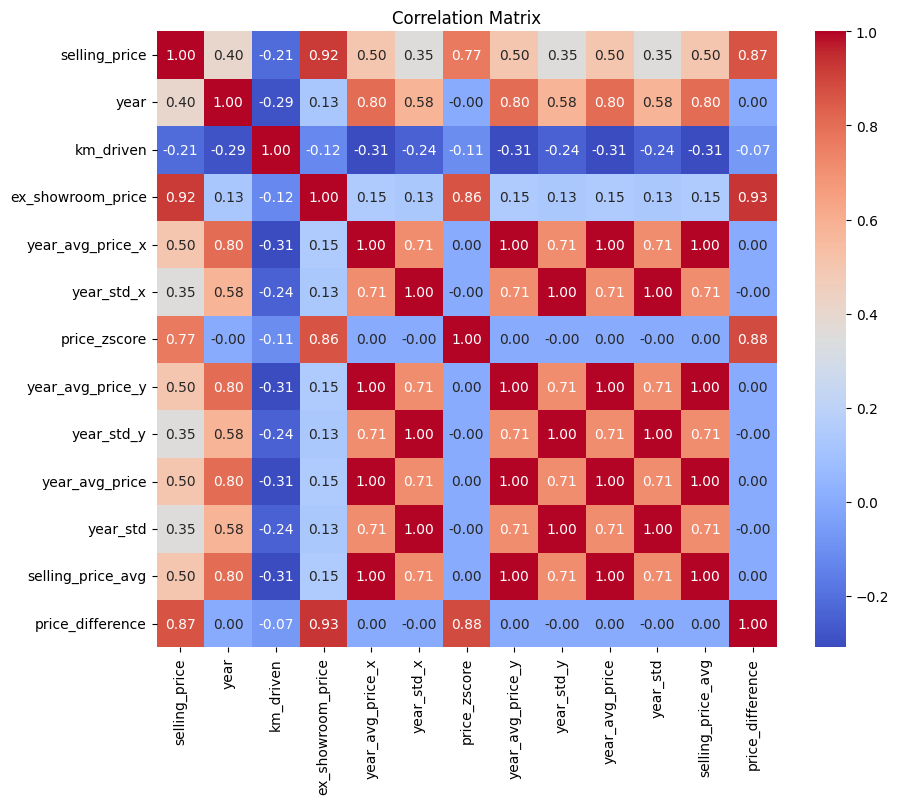

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**EDA 2**


In [13]:
df1 = pd.read_csv('Car Sale.csv')
pd.DataFrame(df1)

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

In [14]:
df1.rename(columns={'Price ($)':'Price'}, inplace=True)


In [15]:
#1.  What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price = df1.groupby('Dealer_Name')['Price'].mean()
avg_price.sort_values(ascending=False, inplace=True)
display(avg_price)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales                                    28013.060317
Diehl Motor CO Inc                                 27993.929487
Motor Vehicle Branch Office                        27956.739617
Ryder Truck Rental and Leasing                     27914.988782
Progressive Shippers Cooperative Association No    27884.264036
New Castle Ford Lincoln Mercury                    27867.131955
Hatfield Volkswagen                                27853.712242
Nebo Chevrolet                                     27818.889415
Clay Johnson Auto Sales                            27816.027113
McKinney Dodge Chrysler Jeep                       27684.096979
Chrysler Plymouth                                  27555.526400
Pitre Buick-Pontiac-Gmc of Scottsdale              27404.248408
Buddy Storbeck's Diesel Service Inc                27217.261563
Name: Price, dtype: float64

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price, dtype: float64

/tmp/ipython-input-16-584996356.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_brand_variation.index, y=car_brand_variation.values, palette='magma')


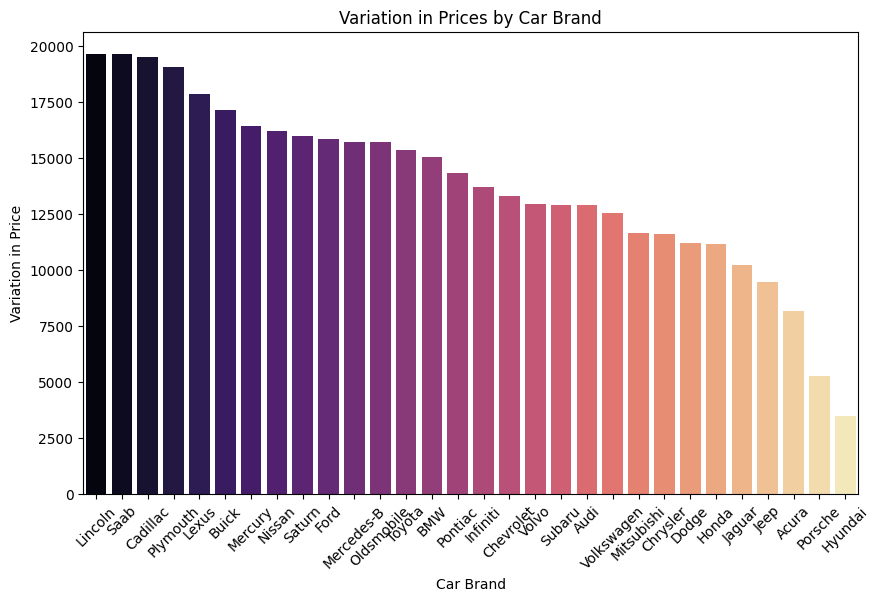

In [16]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
car_brand_variation = df1.groupby('Company')['Price'].std()
car_brand_variation.sort_values(ascending=False, inplace=True)
display(car_brand_variation)

plt.figure(figsize=(10, 6))
sns.barplot(x=car_brand_variation.index, y=car_brand_variation.values, palette='magma')
plt.xlabel('Car Brand')
plt.ylabel('Variation in Price')
plt.title('Variation in Prices by Car Brand')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-17-3174732110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price', data=df1, palette='magma')


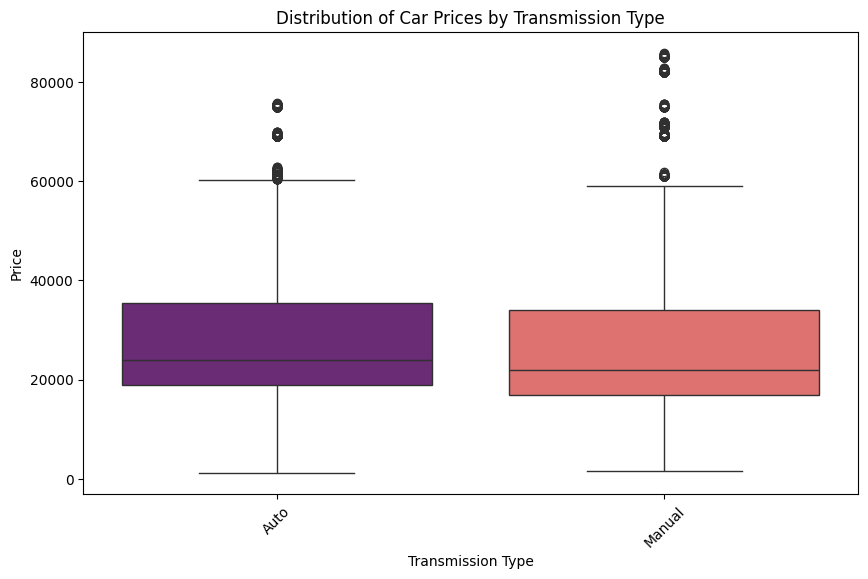

In [17]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', data=df1, palette='magma')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xticks(rotation=45)
plt.show()




In [18]:
iqr_data = df1.groupby('Transmission')['Price'].describe()[['25%', '75%']]
iqr_data['IQR'] = iqr_data['75%'] - iqr_data['25%']
iqr_data = iqr_data.sort_values(by='IQR', ascending=False)
print(iqr_data)

                  25%      75%      IQR
Transmission                           
Manual        17000.0  34000.0  17000.0
Auto          19000.0  35500.0  16500.0


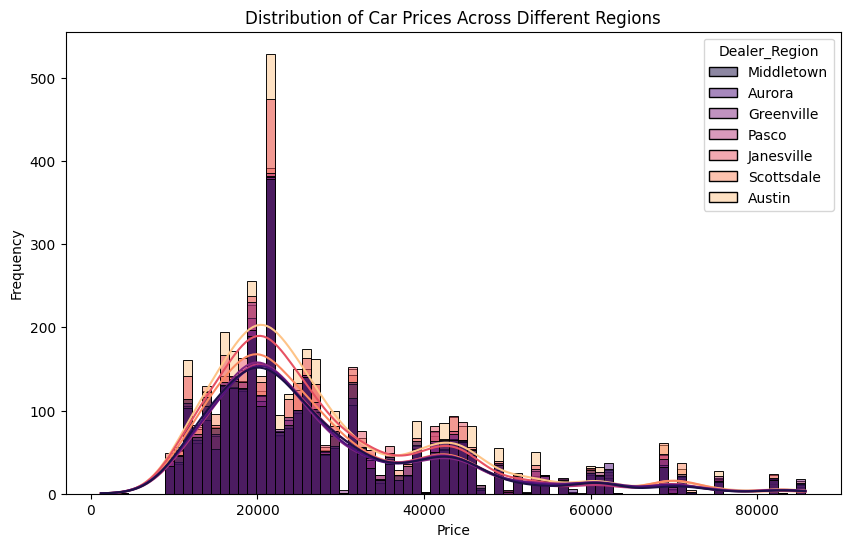

In [19]:
#4. What is the distribution of car prices across different regions?
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Price', hue='Dealer_Region', kde=True, palette='magma')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices Across Different Regions')
plt.show()


/tmp/ipython-input-20-399068184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='magma')


Text(0.5, 1.0, 'Distribution of Cars Based on Body Style')

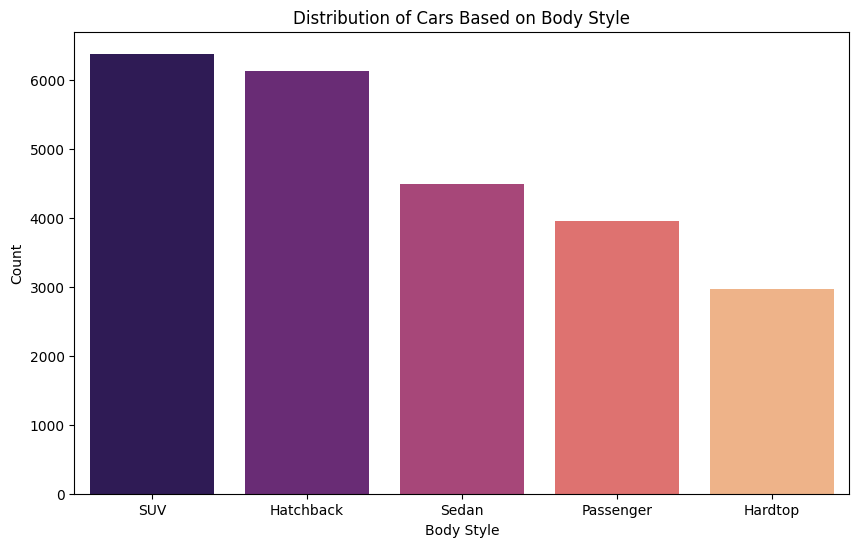

In [20]:
#5. What is the distribution of cars based on body styles?
body_style_counts = df1['Body Style'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='magma')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Distribution of Cars Based on Body Style')

In [21]:
#6.How does the average selling price of cars vary by customer gender and annual income?
# Calculate average selling price by annual income
# To handle the large range of annual income, let's group it into bins
df1['income_bin'] = pd.cut(df1['Annual Income'], bins=10)
avg_by_income = df1.groupby('income_bin')['Price'].mean().reset_index()
display(avg_by_income)

# Visualize average selling price by gender
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_by_gender.index, y=avg_by_gender.values, palette='Set2')
plt.title('Average Car Selling Price by Gender')
plt.ylabel('Avg Selling Price')
plt.show()

# Visualize average selling price by annual income bin
plt.figure(figsize=(10, 6))
sns.barplot(x='income_bin', y='Price', data=avg_by_income, palette='viridis')
plt.title('Average Car Selling Price by Annual Income Bin')
plt.xlabel('Annual Income Bin')
plt.ylabel('Avg Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-21-2135918812.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_income = df1.groupby('income_bin')['Price'].mean().reset_index()


income_bin         Price
0     (-1109.92, 1129072.0]  28067.942112
1    (1129072.0, 2248064.0]  27967.191018
2    (2248064.0, 3367056.0]  29037.524715
3    (3367056.0, 4486048.0]  30211.605839
4    (4486048.0, 5605040.0]  27775.829787
5    (5605040.0, 6724032.0]  27583.666667
6    (6724032.0, 7843024.0]  18000.000000
7    (7843024.0, 8962016.0]  85000.000000
8   (8962016.0, 10081008.0]           NaN
9  (10081008.0, 11200000.0]  26001.000000

NameError: name 'avg_by_gender' is not defined

<Figure size 1000x500 with 0 Axes>

/tmp/ipython-input-22-3923073574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price', data=df1, palette='magma')


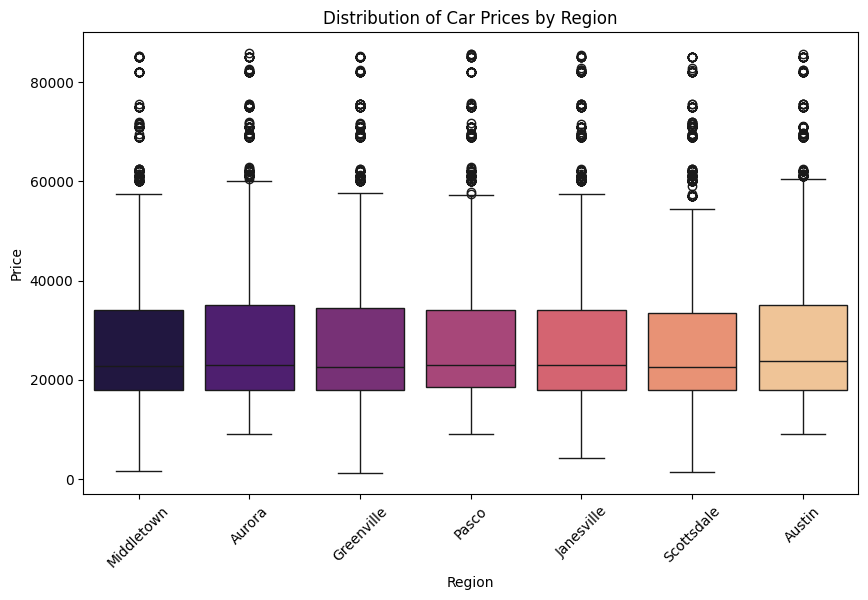

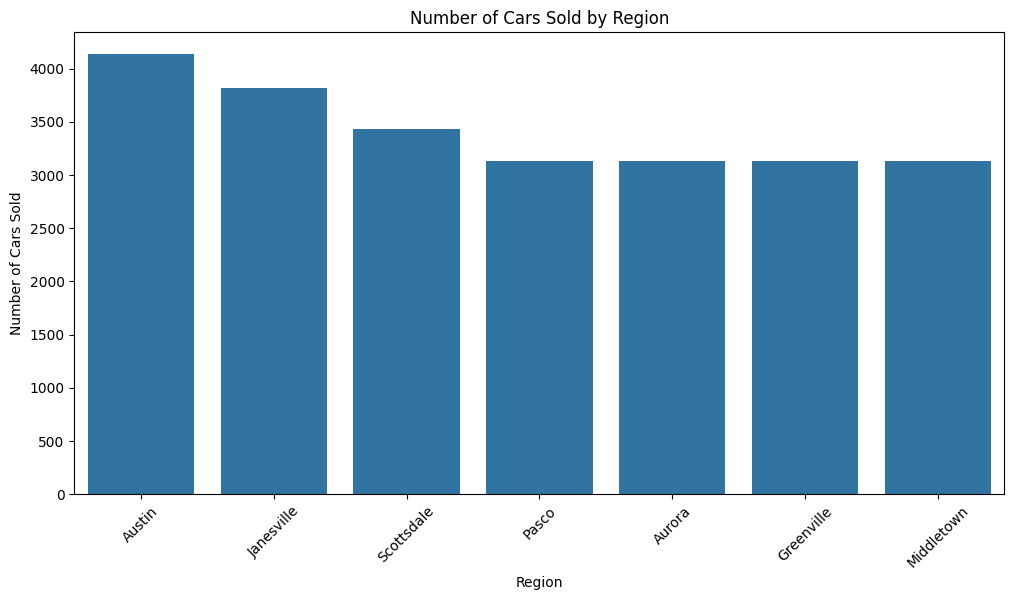

In [22]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price', data=df1, palette='magma')
plt.xlabel('Region')
plt.ylabel('Price')
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='Dealer_Region', data=df1, order=df1['Dealer_Region'].value_counts().index)
plt.title('Number of Cars Sold by Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.show()



/tmp/ipython-input-23-1967490601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Engine', y='Price', data=avg_price_by_engine, palette='magma')


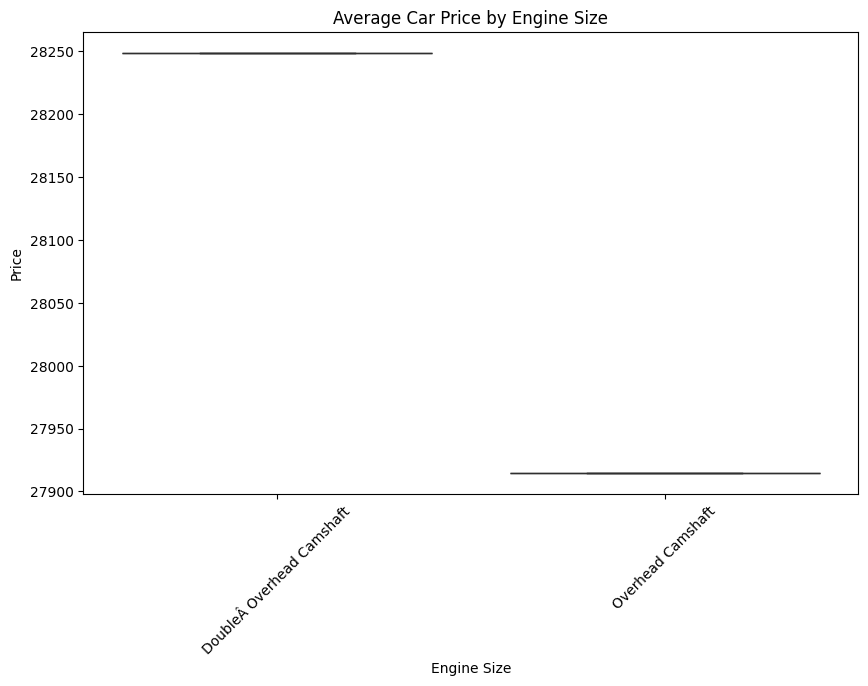

In [23]:
#8. How does the average car price differ between cars with different engine sizes?

avg_price_by_engine = df1.groupby('Engine')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engine', y='Price', data=avg_price_by_engine, palette='magma')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Average Car Price by Engine Size')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


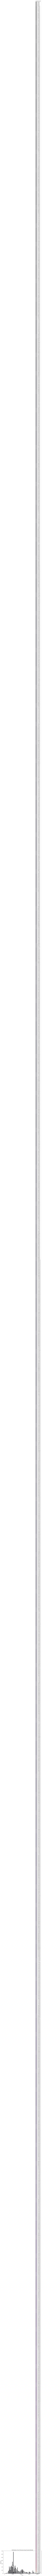

In [24]:
#9. How do car prices vary based on the customer’s annual income bracket?

plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Price', hue='Annual Income', kde=True, palette='magma')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices by Annual Income Bracket')
plt.show()


/tmp/ipython-input-28-985290269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price', data=Top_model_data, palette='Set2')


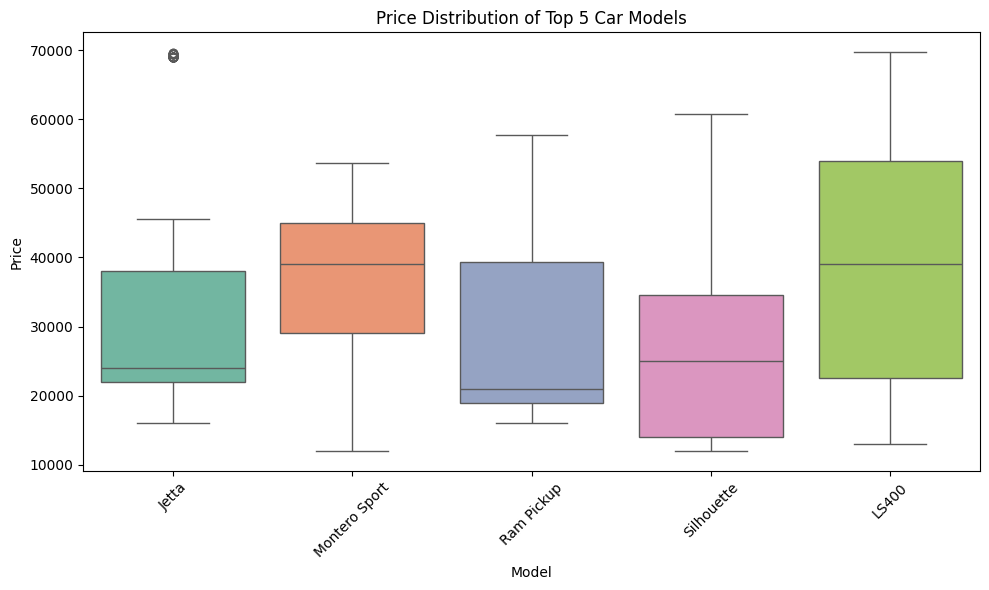

In [28]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
Top_model = df1.groupby('Model')['Price'].sum().nlargest(5).index.sort_values(ascending=True)
Top_model_data = df1[df1['Model'].isin(Top_model)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price', data=Top_model_data, palette='Set2')
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Price Distribution of Top 5 Car Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price Variation?
color_variation = df1.groupby('Color')['Price'].std()
color_variation.sort_values(ascending=False, inplace=True)
display(color_variation)

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price, dtype: float64

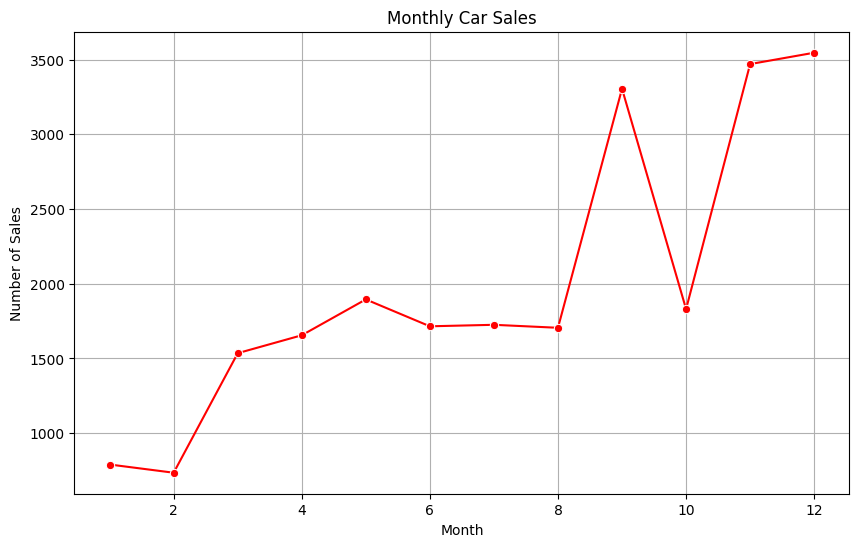

In [32]:
#12.Is there any seasonal trend in car sales based on the date of sale?
df1['Date of Sale'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date of Sale'].dt.month
monthly_sales = df1.groupby('Month').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='red')
plt.title('Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

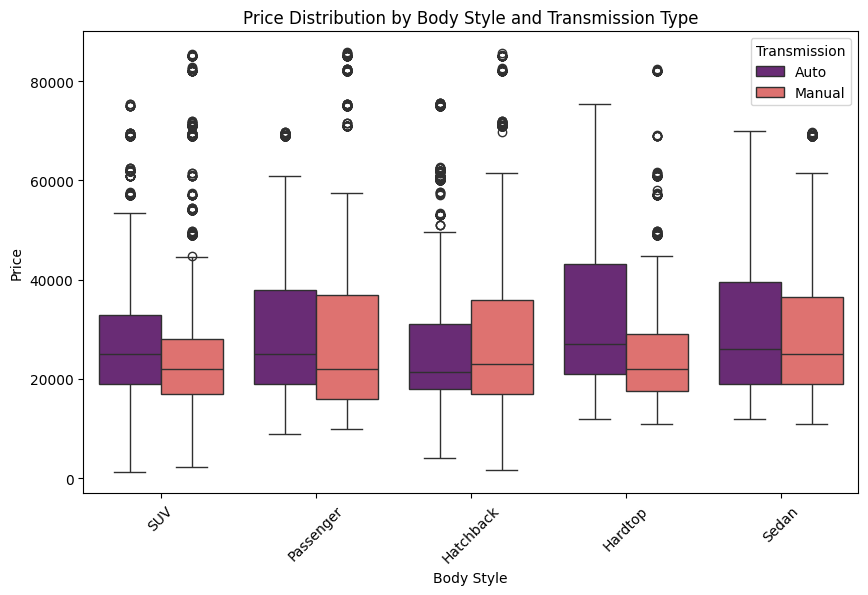

In [33]:
#13.  How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body Style', y='Price', hue='Transmission', data=df1, palette='magma')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.show()

In [41]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# Replace non-numeric engine descriptions with NaN
df1['Engine'] = df1['Engine'].replace(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], np.nan)

# Convert the 'Engine' column to float, coercing errors to NaN
df1['Engine'] = pd.to_numeric(df1['Engine'], errors='coerce')

# Calculate the correlation matrix for numeric columns
correlation_matrix = df1[['Price', 'Engine', 'Annual Income']].corr()

# Display the correlation matrix
display(correlation_matrix)

Price  Engine  Annual Income
Price          1.000000     NaN       0.012065
Engine              NaN     NaN            NaN
Annual Income  0.012065     NaN       1.000000

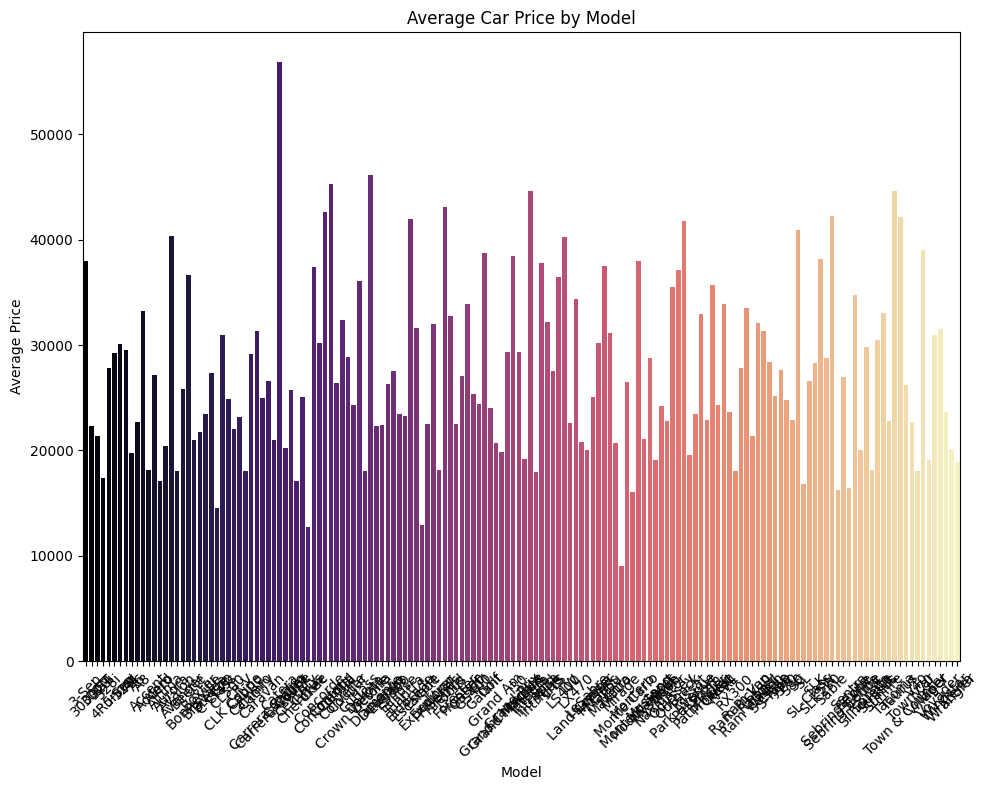

In [46]:
#15. How does the average car price vary across different car models and engine types?
avg_price_by_model = df1.groupby('Model')['Price'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Price', data=avg_price_by_model, palette='magma')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.title('Average Car Price by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()